<a href="https://colab.research.google.com/github/bk-12346/Facial-Expression-Recognition/blob/main/Face_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import skimage.io as io
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from torch.utils.data import Dataset, DataLoader
import cv2
import glob
import numpy
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import sklearn.externals
import joblib
     

import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

# For Image Processing
import imageio
import cv2
import skimage.transform
# From skimage.transform import downscale_local_mean, rescale, resize and charts
import matplotlib.pyplot as plt
import seaborn as sns

# For ML, statistics, to split the training dataset into train and validation sets
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow; From sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception 

from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
!pip install tensorflow-addons
!pip install tensorflow-Ranking
import tensorflow_ranking as tfr
import tensorflow_addons as tfa
import tensorflow_probability as tfp

from tensorflow.keras.utils import plot_model

from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
     

<ipython-input-2-7d7a81edfbd5>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
import sys
import os, zipfile
#import module
import tarfile

!unzip gdrive/My\ Drive/test_set/test_set.zip

Archive:  gdrive/My Drive/test_set/test_set.zip
replace test_set/val_set/annotations/0_aro.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip gdrive/My\ Drive/train_set/train_and_val_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_and_val_set/train_set/annotations/378047_exp.npy  
  inflating: train_and_val_set/train_set/annotations/378047_lnd.npy  
  inflating: train_and_val_set/train_set/annotations/378047_val.npy  
  inflating: train_and_val_set/train_set/annotations/378048_aro.npy  
  inflating: train_and_val_set/train_set/annotations/378048_exp.npy  
  inflating: train_and_val_set/train_set/annotations/378048_lnd.npy  
  inflating: train_and_val_set/train_set/annotations/378048_val.npy  
  inflating: train_and_val_set/train_set/annotations/37804_aro.npy  
  inflating: train_and_val_set/train_set/annotations/37804_exp.npy  
  inflating: train_and_val_set/train_set/annotations/37804_lnd.npy  
  inflating: train_and_val_set/train_set/annotations/37804_val.npy  
  inflating: train_and_val_set/train_set/annotations/378050_aro.npy  
  inflating: train_and_val_set/train_set/annotations/378050_exp.npy  
  inflating: train_and_val_set/train_set/an

In [6]:
train_dataset_path ='/content/train_and_val_set/train_set/images'
train_labels_path='/content/train_and_val_set/train_set/annotations'
test_dataset_path ='/content/test_set/val_set/images'
test_labels_path='/content/test_set/val_set/annotations'

In [7]:
Ind=[]
i=0
for dirname, _, filenames in os.walk(train_dataset_path):
    for filename in filenames:
        Ind.insert(1,os.path.join(dirname, filename))
        i=i+1
Image={"Image":Ind}
trainData = pd.DataFrame(Image) 
trainData

,Image
0,/content/train_and_val_set/train_set/images/35...
1,/content/train_and_val_set/train_set/images/15...
2,/content/train_and_val_set/train_set/images/25...
3,/content/train_and_val_set/train_set/images/36...
4,/content/train_and_val_set/train_set/images/20...
...,...
287646,/content/train_and_val_set/train_set/images/47...
287647,/content/train_and_val_set/train_set/images/25...
287648,/content/train_and_val_set/train_set/images/68...
287649,/content/train_and_val_set/train_set/images/12...


In [8]:
from functools import reduce
Val=[]
Exp=[]
Aro=[]
LM=[]
for cls_pth in glob.glob(train_labels_path+'/*'):
    a=cls_pth
    if (a.split('/')[-1]).endswith('_val.npy'):
      b=np.load(a)
      b=np.asarray(b).astype(np.float32) 
      Val.append(b)
    elif(a.split('/')[-1]).endswith('_exp.npy'):
      ex=np.load(a)
      ex=np.asarray(ex).astype(np.float32)
      Exp.append(ex)
    elif(a.split('/')[-1]).endswith('_aro.npy'):
      ar=np.load(a)
      ar=np.asarray(ar).astype(np.float32)
      Aro.append(ar)
    elif(a.split('/')[-1]).endswith('_lnd.npy'):
      lam=ar=np.load(a)
      lam=np.reshape(lam, (68,2), order='C')
      lam=np.asarray(lam).astype(np.float32)
      LM.append(lam)
    i=i+1
print(Val[0])
print(Exp[0])
print(Aro[0])
print(LM[0])
label1={"Expression":Exp}
label2={"Valance":Val}
label3={"Arosual":Aro}
Landmark={"Landmarks":LM}
dflm= pd.DataFrame(Landmark) 
dfy1 = pd.DataFrame(label1) 
dfy1['Expression'] = dfy1['Expression'].astype(float, errors = 'raise')
dfy2 = pd.DataFrame(label2)
dfy2['Valance'] = dfy2['Valance'].astype(float, errors = 'raise')
dfy3 = pd.DataFrame(label3)
dfy3['Arosual'] = dfy3['Arosual'].astype(float, errors = 'raise')
dfall= pd.concat([trainData,dflm, dfy1,dfy2,dfy3], axis=1)
dfall.to_csv('/content/Trainfile.csv')
dfall

-0.396825
0.0
0.249054
[[-23.072    109.52855 ]
 [-23.168    136.38501 ]
 [-22.66     165.76392 ]
 [-15.568    193.12645 ]
 [  2.428    214.3731  ]
 [ 28.06     231.44966 ]
 [ 58.004    242.92035 ]
 [ 86.616    250.5544  ]
 [109.952    251.29584 ]
 [126.456    243.2028  ]
 [135.328    223.85092 ]
 [142.984    203.3457  ]
 [151.136    183.58192 ]
 [158.076    164.06529 ]
 [160.92     147.20448 ]
 [159.42     130.35545 ]
 [154.356    115.62872 ]
 [ 36.136     86.897095]
 [ 51.72      77.674255]
 [ 70.332     73.12364 ]
 [ 91.084     72.60973 ]
 [109.332     77.94886 ]
 [130.396     78.23524 ]
 [139.632     73.19033 ]
 [149.62      72.14291 ]
 [157.46      74.8615  ]
 [158.388     83.87643 ]
 [121.308     99.81142 ]
 [126.528    111.59986 ]
 [132.56     123.26669 ]
 [138.68     135.58865 ]
 [105.688    151.59425 ]
 [117.728    154.55215 ]
 [127.148    157.59244 ]
 [134.984    155.57997 ]
 [140.792    152.1317  ]
 [ 56.068    103.059616]
 [ 68.784     98.0814  ]
 [ 79.696     97.50081 ]
 [

,Image,Landmarks,Expression,Valance,Arosual
0,/content/train_and_val_set/train_set/images/35...,"[[-23.072, 109.52855], [-23.168, 136.38501], [...",0.0,-0.396825,0.249054
1,/content/train_and_val_set/train_set/images/15...,"[[-16.808104, 75.35931], [-19.712648, 108.3239...",1.0,0.507936,0.233502
2,/content/train_and_val_set/train_set/images/25...,"[[11.8429, 86.37754], [13.643022, 110.99135], ...",1.0,0.487665,-0.058072
3,/content/train_and_val_set/train_set/images/36...,"[[14.746667, 72.06267], [14.485333, 100.482666...",1.0,0.460317,-0.283921
4,/content/train_and_val_set/train_set/images/20...,"[[28.121021, 85.05969], [28.816345, 108.01108]...",0.0,0.528225,0.872872
...,...,...,...,...,...
287646,/content/train_and_val_set/train_set/images/47...,"[[57.656666, 95.94666], [56.0, 116.80666], [57...",1.0,0.912698,0.015873
287647,/content/train_and_val_set/train_set/images/25...,"[[25.03908, 83.566635], [25.425287, 104.942314...",1.0,0.813008,0.579365
287648,/content/train_and_val_set/train_set/images/68...,"[[26.93126, 85.74305], [27.648878, 109.17651],...",0.0,-0.149701,0.163958
287649,/content/train_and_val_set/train_set/images/12...,"[[45.72124, 86.50608], [43.500168, 104.989174]...",1.0,0.661376,0.147493


In [9]:
Ind=[]
i=0
for dirname, _, filenames in os.walk(test_dataset_path):
    for filename in filenames:
        Ind.insert(1,os.path.join(dirname, filename))
        i=i+1
Image={"Image":Ind}
dfx_test = pd.DataFrame(Image) 
dfx_test

,Image
0,/content/test_set/val_set/images/4098.jpg
1,/content/test_set/val_set/images/659.jpg
2,/content/test_set/val_set/images/1745.jpg
3,/content/test_set/val_set/images/1919.jpg
4,/content/test_set/val_set/images/4836.jpg
...,...
3994,/content/test_set/val_set/images/1625.jpg
3995,/content/test_set/val_set/images/526.jpg
3996,/content/test_set/val_set/images/1374.jpg
3997,/content/test_set/val_set/images/4399.jpg


In [10]:
from functools import reduce
Val=[]
Exp=[]
Aro=[]
LM=[]
for cls_pth in glob.glob(test_labels_path+'/*'):
    a=cls_pth
    if (a.split('/')[-1]).endswith('_val.npy'):
      b=np.load(a)
      b=np.asarray(b).astype(np.float32) 
      Val.append(b)
    elif(a.split('/')[-1]).endswith('_exp.npy'):
      ex=np.load(a)
      ex=np.asarray(ex).astype(np.float32)
      Exp.append(ex)
    elif(a.split('/')[-1]).endswith('_aro.npy'):
      ar=np.load(a)
      ar=np.asarray(ar).astype(np.float32)
      Aro.append(ar)
    elif(a.split('/')[-1]).endswith('_lnd.npy'):
      lam=ar=np.load(a)
      lam=np.reshape(lam, (68,2), order='C')
      lam=np.asarray(lam).astype(np.float32)
      LM.append(lam)
    i=i+1
print(Val[0])
print(Exp[0])
print(Aro[0])
print(LM[0])
label1={"Expression":Exp}
label2={"Valance":Val}
label3={"Arosual":Aro}
Landmark={"Landmarks":LM}
dflm_test= pd.DataFrame(Landmark) 
dfy1_test = pd.DataFrame(label1) 
dfy1_test['Expression'] = dfy1['Expression'].astype(float, errors = 'raise')
dfy2_test = pd.DataFrame(label2)
dfy2_test['Valance'] = dfy2['Valance'].astype(float, errors = 'raise')
dfy3_test = pd.DataFrame(label3)
dfy3_test['Arosual'] = dfy3['Arosual'].astype(float, errors = 'raise')
dfall_test= pd.concat([dfx_test,dflm_test, dfy1_test,dfy2_test,dfy3_test], axis=1)
dfall_test.to_csv('/content/Testfile1.csv')
dfall_test

0.00793651
0.0
0.866706
[[ 36.4672    79.97559 ]
 [ 38.508087 100.942375]
 [ 44.182755 122.45017 ]
 [ 51.808712 142.4678  ]
 [ 60.26098  163.14983 ]
 [ 71.12249  181.68678 ]
 [ 82.76054  198.93288 ]
 [ 96.25031  214.10983 ]
 [116.539734 219.31119 ]
 [140.57245  216.53017 ]
 [164.29654  204.85559 ]
 [185.92     187.9322  ]
 [202.39644  168.8827  ]
 [212.94934  144.61288 ]
 [217.23022  119.04271 ]
 [219.24124   94.241356]
 [219.50009   67.86441 ]
 [ 35.093334  63.28    ]
 [ 42.520176  50.997967]
 [ 57.57298   48.22644 ]
 [ 73.15342   52.061016]
 [ 87.140976  60.61288 ]
 [117.14702   58.75254 ]
 [135.33582   49.79254 ]
 [154.112     44.543728]
 [172.41031   46.35661 ]
 [187.6025    55.81017 ]
 [101.74578   78.08678 ]
 [100.72035   96.87051 ]
 [ 99.31662  115.73017 ]
 [ 98.08213  134.26712 ]
 [ 87.31022  139.6678  ]
 [ 94.84658  144.77423 ]
 [103.965866 148.03932 ]
 [114.05084  144.1383  ]
 [123.847115 140.6834  ]
 [ 52.5056    79.55797 ]
 [ 60.380444  73.51186 ]
 [ 73.03396   73.54983 ]
 

,Image,Landmarks,Expression,Valance,Arosual
0,/content/test_set/val_set/images/4098.jpg,"[[36.4672, 79.97559], [38.508087, 100.942375],...",0.0,-0.396825,0.249054
1,/content/test_set/val_set/images/659.jpg,"[[64.50728, 95.582634], [61.40907, 110.35388],...",1.0,0.507936,0.233502
2,/content/test_set/val_set/images/1745.jpg,"[[-9.529003, 128.32484], [-2.0455306, 151.6751...",1.0,0.487665,-0.058072
3,/content/test_set/val_set/images/1919.jpg,"[[25.348862, 75.03367], [28.155949, 98.99028],...",1.0,0.460317,-0.283921
4,/content/test_set/val_set/images/4836.jpg,"[[40.831497, 100.50667], [44.07685, 119.59111]...",0.0,0.528225,0.872872
...,...,...,...,...,...
3994,/content/test_set/val_set/images/1625.jpg,"[[18.711723, 90.214195], [20.343449, 112.90323...",1.0,-0.458259,0.047619
3995,/content/test_set/val_set/images/526.jpg,"[[37.93487, 85.20249], [35.612846, 104.75331],...",1.0,0.784632,0.706349
3996,/content/test_set/val_set/images/1374.jpg,"[[47.79189, 92.2738], [46.883358, 110.067604],...",2.0,-0.612672,-0.084281
3997,/content/test_set/val_set/images/4399.jpg,"[[-15.553447, 91.726105], [-16.009039, 120.213...",2.0,-0.087108,0.126984


In [11]:
# to create generators for train, validate and test
class Generators:
    def __init__(self, train_df, test_df):
        self.batch_size=128                 #taking batch size as 128
        self.img_size=(224,224)
        _datagen = ImageDataGenerator(
            rescale=None,
            validation_split=0.25,
            featurewise_center=False,
            featurewise_std_normalization=True,
            rotation_range=90,
            width_shift_range=0.2,            
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            dtype=float
            )
        # Train generator
        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=train_df,
            directory='/content/train_and_val_set/train_set/images',
            x_col=np.asarray("Image"),
            y_col=['Expression','Valance','Arosual'],
            image_size=(224,224),
            has_ext=False,
            subset="training",
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="multi_output",            
            target_size=self.img_size)
       
        # Validation generator
        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=train_df,
            directory='/content/train_and_val_set/train_set/images',    
            x_col="Image",
            y_col=['Expression','Valance','Arosual'],
            has_ext=False,
            subset="validation",
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="multi_output",
            target_size=self.img_size)   

        #test generator 
        test_datagen=ImageDataGenerator(rescale=1./255.)
       
        self.test_generator=test_datagen.flow_from_dataframe(
        dataframe=dfall_test,
        directory="/content/test_set/val_set/images",
        x_col="Image",
        y_col=['Expression','Valance','Arosual'],
        batch_size=self.batch_size,
        seed=42,
        shuffle=False,
        class_mode="multi_output",
        target_size=self.img_size)    
        print('Test generator created')
             
# Create generators        
generators = Generators(dfall, dfall_test)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 215739 validated image filenames.
Found 71912 validated image filenames.
Found 3999 validated image filenames.
Test generator created


## **Training Function**

In [12]:
#Creating a model; data is fit to this model to determine parameters
class ModelTrainer:
    
    def __init__(self, generators):
        self.generators = generators
        self.img_width = generators.img_size[0]
        self.img_height = generators.img_size[1]
        
    def create_model(self, base_model):
      visible = Input(shape=(224,224,3))
      x= base_model(visible, training=True)
      flat = GlobalAveragePooling2D()(x)
      hidden1 = Dense(2048, activation='relu')(flat)
      hidden1 = Dense(1024, activation='relu')(hidden1)

      expression = Dense(8, name='expression')(hidden1)
      valence = Dense(1, activation='linear', name='valence')(hidden1)
      arrousal = Dense(1, activation='linear', name='arrousal')(hidden1)

      model = Model(inputs=visible, outputs=[expression,valence,arrousal])
      model.compile(optimizer=Adam(learning_rate=0.001), 
                    loss=[SparseCategoricalCrossentropy(from_logits=True), MeanSquaredError(), MeanSquaredError()], 
                    metrics=['accuracy'])
      model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss=[SparseCategoricalCrossentropy(from_logits=True), MeanSquaredError(), MeanSquaredError()],
                    loss_weights={'expression': 5, 'valence': 0.25, 'arrousal':0.25},
                    metrics={'expression':'accuracy','expression':tfa.metrics.CohenKappa(num_classes=8,sparse_labels=True),'valence': 'RootMeanSquaredError', 'arrousal':'RootMeanSquaredError'})
      
      [print(i.shape, i.dtype) for i in model.inputs]
      [print(o.shape, o.dtype) for o in model.outputs]
      [print(l.name, l.input_shape, l.dtype) for l in model.layers]

      return model
        
    
    def train(self, model, typeModel ):
       
        epochs=3
        validation_steps=5
            
        # the model is stopped from training further if there is no more improvement after an epoch
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
        
        # the best model is saved to be used during test time
        checkpointer = ModelCheckpoint('/content/model' + str(typeModel) +'.h5'
                                        ,verbose=1
                                        ,save_weights_only=True)
        # model training
        training = model.fit_generator(generator=self.generators.train_generator
                                ,epochs=epochs
                                ,validation_data=self.generators.val_generator
                                ,validation_steps=validation_steps
                                ,callbacks=[checkpointer, reduce_lr])
        joblib.dump(model, '/content/model_' + str(typeModel) +'.pkl', compress=1)
        joblib.dump(training, '/content/training_' + str(typeModel) +'.pkl', compress=1)
        return training

## **Evaluation Function**

In [13]:
# for evaluation of the architecture during validation and test
class Eval:
  
    def __init__(self, model, training, generator, y_true):
        self.training = training
        self.generator = generator

        steps=5
        self.expression, self.valance, self.arosual = model.predict_generator(self.generator, steps=steps)
        self.y_pred = np.argmax(self.expression, axis=1)
        self.y_true=y_true[:len(self.y_pred)] 

    def plot_history(self):
        fig, s = plt.subplots(2)
        s[0].plot(self.training.history['loss'], label="Loss")
        s[0].plot(self.training.history['val_loss'], label="Validation loss")
        s[0].set_title('Loss Plot')
        s[0].set_xlabel('Epoch')
        s[0].set_ylabel('Loss')
        s[0].legend()

        #Accuracy
        s[1].plot(self.training.history['expression_cohen_kappa'], label="cohen_kappa")
        s[1].plot(self.training.history['val_expression_cohen_kappa'], label="cohen_kappa validation")
        s[1].set_title('cohen_kappa')
        s[1].set_xlabel('Epoch')
        s[1].set_ylabel('cohen_kappa')
        s[1].legend()
        plt.tight_layout()
        plt.show()

    def print_report(self):
        print(metrics.classification_report(self.y_true, self.y_pred))

## **VGG-16 Architecture**

In [14]:
#using a base model where the weights are pre-trained according to the ImageNet dataset and the input size is 224x224x3
v_base_model = VGG16(weights= 'imagenet', 
                  include_top=False, 
                  input_shape=(224, 224, 3))

(None, 224, 224, 3) <dtype: 'float32'>
(None, 8) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_2 [(None, 224, 224, 3)] float32
vgg16 (None, 224, 224, 3) float32
global_average_pooling2d (None, 7, 7, 512) float32
dense (None, 512) float32
dense_1 (None, 2048) float32
expression (None, 1024) float32
valence (None, 1024) float32
arrousal (None, 1024) float32
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_2[0][0]']             

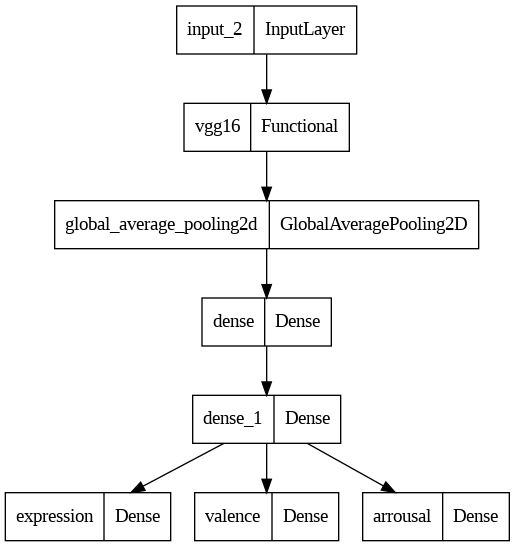

In [15]:
# to train the VGG model
trainer2 = ModelTrainer(generators)
model2= trainer2.create_model(v_base_model)
model2.summary()
plot_model(model2, to_file='/content/VGG_16_archi.png')

In [ ]:
modelType="VGG16"
training2=trainer2.train(model2,modelType)

# For test data
test_model2=joblib.load('/content/model_' + str(typeModel) +'.pkl')
test_training2=joblib.load('/content/training_' + str(typeModel) +'.pkl')

# For data evaluation
evaluator2 = Eval(test_model2, test_training2, generators.test_generator, dfall_test['Expression'])
evaluator2.plot_history()
evaluator2.print_report()

<ipython-input-15-b5cd0fd4f668>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(generator=self.generators.train_generator
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/3
   6/1686 [..............................] - ETA: 142:52:10 - loss: 9.9438 - expression_loss: 1.7950 - valence_loss: 1.8617 - arrousal_loss: 2.0128 - expression_cohen_kappa: -0.0118 - valence_root_mean_squared_error: 1.3644 - arrousal_root_mean_squared_error: 1.4187 

## **Xception Architecture**

83683744/83683744 [==============================] - 1s 0us/step
(None, 224, 224, 3) <dtype: 'float32'>
(None, 8) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_4 [(None, 224, 224, 3)] float32
xception (None, 224, 224, 3) float32
global_average_pooling2d_1 (None, 7, 7, 2048) float32
dense_2 (None, 2048) float32
dense_3 (None, 2048) float32
expression (None, 1024) float32
valence (None, 1024) float32
arrousal (None, 1024) float32
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Function

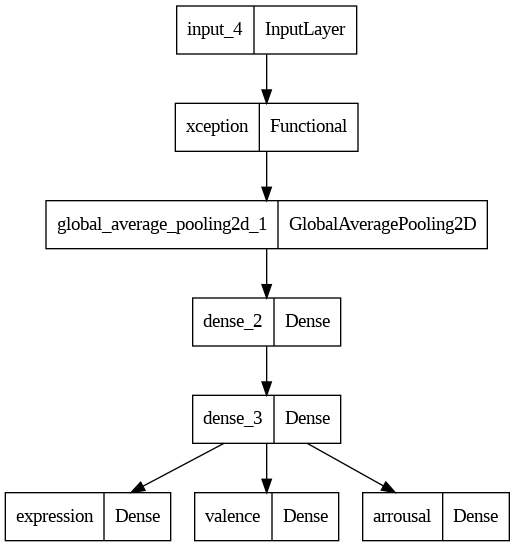

In [16]:
#using a base model where the weights are pre-trained according to the ImageNet dataset and the input size is 224x224x3

xc_base_model=Xception(weights="imagenet",
                             include_top=False,
                             input_shape =(224, 224,3))

trainer1 = ModelTrainer(generators)
model1= trainer1.create_model(xc_base_model)
model1.summary()
plot_model(model1, to_file='/content/xception_model.png')

In [ ]:
typeModel="Xception"
training=trainer1.train(model1, typeModel)


typeModel="Xception"
test_model=joblib.load('/content/model_' + str(typeModel) +'.pkl')
test_training=joblib.load('/content/training_' + str(typeModel) +'.pkl')

evaluator = Eval(test_model, test_training, generators.test_generator, dfall_test['Expression'])
evaluator.plot_history()
evaluator.print_report()

<ipython-input-12-b5cd0fd4f668>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(generator=self.generators.train_generator
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/3
